In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY

In [2]:
x_train = pd.read_csv('news_set/train(originalwrong).csv').set_index('date')
#x_valid = pd.read_csv('news_set/validate(originalwrong).csv').set_index('date')
#x_test = pd.read_csv('news_set/test(originalwrong).csv').set_index('date')
x_train = x_train['title'].groupby(x_train.index).apply(list).apply(pd.Series)#.fillna('')
#x_valid = x_valid['title'].groupby(x_valid.index).apply(list).apply(pd.Series).fillna('')
#x_test = x_test['title'].groupby(x_test.index).apply(list).apply(pd.Series).fillna('')
#label = pd.read_csv('price_set/train_label(original wrong).csv').set_index('Date')
#y_train = label['Close'].values

news uncertainty in news amount

In [3]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
date,,,,,,,,,,,,,,,,,,,,,
2006-10-20,exxon mobil offers plan to end alaska dispute .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-23,royal dutch bid for shell canada low sharehold...,dow ends at record high texas instruments off ...,shell looks to buy out canada unit for c xxx b...,ford is reviewing all products brands ceo .,at t earnings beat expectations .,ford won t sell ford credit .,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,microsoft to start vista coupon plan for pc bu...,options scandal hits xxx companies us study .,u . s . tech stocks fall on texas instruments ...,ge wal mart shenzhen bank tie up on china cred...,lockheed martin ups forecast .,microsoft to defer xxx billion in sales to thi...,jim cramer bare escentuals allergan medicis av...,pepsico looks to new products acquisitions .,amazon profit beats expectations .,phelps dodge net doubles but off wall st . tar...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-25,boeing profit tops views but forecast disappoi...,u . s . stocks gain exxon and altria jump .,amazon profit beats forecasts .,honda q2 drops on finance losses yen lifts f c...,existing home sales fall for 6th straight month .,altria net hit by spain conwood lifts reynolds .,stocks seen up slightly after amazon results .,altria promises january details for kraft .,gm signals it is closer to labor deal with del...,gm posts profit but tough part of recovery loo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-26,analysts sound note of caution on gm cash burn .,us airways reports loss after hedging .,comcast third quarter profit up on record subs...,microsoft profit rises 11 percent .,instant view 4 microsoft posts higher results .,dow chemical earnings rise on strong sales .,nissan us sales on track for oct double digit ...,us durable goods orders surge in september .,stocks gain on strong profits microsoft up late .,microsoft cfo says tender offer lowered outlook .,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-17,bank of america wins initial approval of 20 mi...,german budget committee won t give guidance on...,intel s sales forecast falls short of some ana...,volkswagen wins france with financing peugeot ...,morgan stanley german chief notheis steps down...,bank of america syncora settle mortgage fraud ...,mali preparing military action to take control...,german property sale said to draw blackstone m...,defense industry says budget cuts may cost 2 m...,gross says u . s . nearing recession as blackr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-18,u . s . bancorp sells xxx billion of bonds aft...,abbott profit tops estimates as humira drug sa...,turkey yields sink third day to 10 month low o...,brazil said to plan tax rate cuts to lower ene...,visa europe should match mastercard fee cut al...,thai beverage to pay s xxx billion for ocbc s ...,bernanke says inflation to remain near fed s 2...,franken questions facebook on facial recogniti...,a netflix for magazines comes to ipad rich jar...,france will miss xxx offshore wind capacity ta...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-19,morgan stanley cuts pay pool for investment ba...,citigroup sees charge on smith barney valuation .,kazakhstan isn t planning to limit grain expor...,philly fed contracts home sales fall .,aig scorned by old republic for insuring homes...,kit digital shares fall to month low in prague...,textron earnings soar past wall street target .,amr ceo said to tell suitor he won t be rushed...,exxon mobil said to sell fuel oil shipment to ...,russian weather center predicts southern rain ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#x_train.to_csv('Result.csv') 
x2006 = x_train['2006-10-20':'2006-12-30']
x2007 = x_train['2007-01-02':'2007-12-31']
x2008 = x_train['2008-01-01':'2008-12-31']
x2009 = x_train['2009-01-01':'2009-12-31']
x2010 = x_train['2010-01-01':'2010-12-31']
x2011 = x_train['2011-01-01':'2011-12-31']

In [5]:
x2007.index

Index(['2007-01-02', '2007-01-03', '2007-01-04', '2007-01-05', '2007-01-07',
       '2007-01-08', '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
       ...
       '2007-12-20', '2007-12-21', '2007-12-22', '2007-12-23', '2007-12-24',
       '2007-12-26', '2007-12-27', '2007-12-28', '2007-12-30', '2007-12-31'],
      dtype='object', name='date', length=335)

In [6]:
count = []
for i in x_train.index:
    c = x_train.loc[i].count()
    count.append(c)    
#count

In [13]:
s = pd.Series(count, index=x_train.index)
s

date
2006-10-20     1
2006-10-23     6
2006-10-24    10
2006-10-25    12
2006-10-26    13
              ..
2012-07-17    51
2012-07-18    65
2012-07-19    71
2012-07-20    43
2012-07-21    10
Length: 1994, dtype: int64

In [6]:
count_2006 = []
count_2007 = []
count_2008 = []
count_2009 = []
count_2010 = []
count_2011 = []

for i in x2007.index:
    c = x2007.loc[i].count()
    count_2007.append(c)
    
for i in x2008.index:
    c = x2008.loc[i].count()
    count_2008.append(c)

for i in x2006.index:
    c = x2006.loc[i].count()
    count_2006.append(c)
    
for i in x2009.index:
    c = x2009.loc[i].count()
    count_2009.append(c)
    
for i in x2010.index:
    c = x2010.loc[i].count()
    count_2010.append(c)
    
for i in x2011.index:
    c = x2011.loc[i].count()
    count_2011.append(c)
    
#count_2007

In [7]:
s2006 = pd.Series(count_2006, index=x2006.index)
s2007 = pd.Series(count_2007, index=x2007.index)
s2008 = pd.Series(count_2008, index=x2008.index)
s2009 = pd.Series(count_2009, index=x2009.index)
s2010 = pd.Series(count_2010, index=x2010.index)
s2011 = pd.Series(count_2011, index=x2011.index)

In [26]:
x2006.index

Index(['2006-10-20', '2006-10-23', '2006-10-24', '2006-10-25', '2006-10-26',
       '2006-10-27', '2006-10-28', '2006-10-30', '2006-10-31', '2006-11-01',
       '2006-11-02', '2006-11-03', '2006-11-05', '2006-11-06', '2006-11-07',
       '2006-11-08', '2006-11-09', '2006-11-10', '2006-11-11', '2006-11-13',
       '2006-11-14', '2006-11-15', '2006-11-16', '2006-11-17', '2006-11-18',
       '2006-11-19', '2006-11-20', '2006-11-21', '2006-11-22', '2006-11-23',
       '2006-11-24', '2006-11-25', '2006-11-26', '2006-11-28', '2006-11-29',
       '2006-11-30', '2006-12-01', '2006-12-02', '2006-12-03', '2006-12-04',
       '2006-12-05', '2006-12-06', '2006-12-07', '2006-12-08', '2006-12-10',
       '2006-12-11', '2006-12-12', '2006-12-13', '2006-12-14', '2006-12-15',
       '2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19', '2006-12-20',
       '2006-12-21', '2006-12-22', '2006-12-24', '2006-12-26', '2006-12-27',
       '2006-12-28', '2006-12-29', '2006-12-30'],
      dtype='object', name

In [26]:
#s2007 = s2007.resample('D').sum()#, how='sum')
#s2007.plot(title='resampled plot',kind='bar')

In [21]:
#x_train.loc['2011-04-23'].count()
len(count)

1994

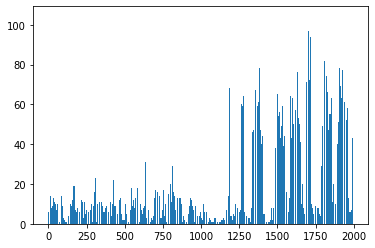

In [31]:
# 生成数据
# 生成图形

x = np.arange(len(count))
plt.bar(x,count)
#plt.plot(x,count_see)

# 显示图形
plt.show()

In [ ]:
plt.bar(x,count)

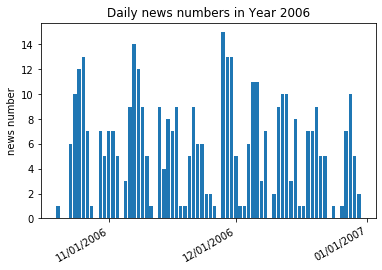

<Figure size 432x288 with 0 Axes>

In [8]:
s2006.index = pd.to_datetime(s2006.index)
# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Plot
plt.bar(s2006.index, count_2006)
plt.title("Daily news numbers in Year 2006")
#plt.xlabel("days")
plt.ylabel("news number")
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.show()

plt.savefig("2006.jpg")
#monthsLoc = mpl.dates.MonthLocator()
#ax1.xaxis.set_major_locator(monthsLoc)

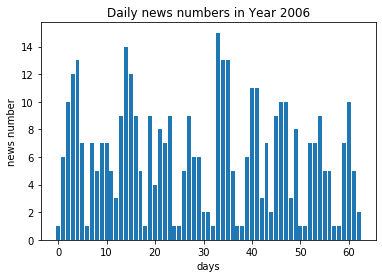

In [45]:
x6 = np.arange(len(count_2006))
plt.bar(x6,count_2006)
plt.title("Daily news numbers in Year 2006")
plt.xlabel("days")
plt.ylabel("news number")

plt.show()

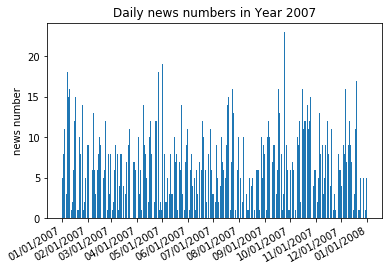

In [9]:
s2007.index = pd.to_datetime(s2007.index)
# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Plot
plt.bar(s2007.index, count_2007)
plt.title("Daily news numbers in Year 2007")
#plt.xlabel("days")
plt.ylabel("news number")
plt.gcf().autofmt_xdate()  # 自动旋转日期标记

plt.savefig("2007.jpg")
plt.show()


#monthsLoc = mpl.dates.MonthLocator()
#ax1.xaxis.set_major_locator(monthsLoc)

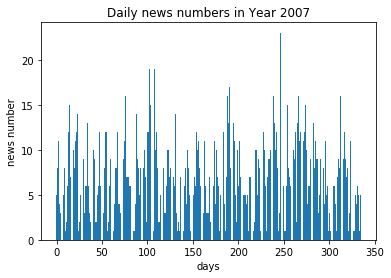

In [40]:
x7 = np.arange(len(count_2007))
plt.bar(x7,count_2007)
plt.title("Daily news numbers in Year 2007")
plt.xlabel("days")
plt.ylabel("news number")
plt.show()

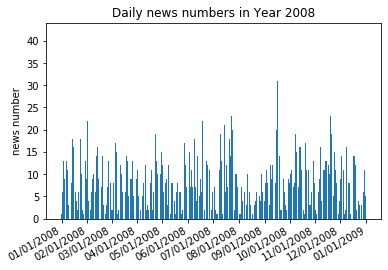

In [10]:
s2008.index = pd.to_datetime(s2008.index)
# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Plot
plt.bar(s2008.index, count_2008)
plt.title("Daily news numbers in Year 2008")
#plt.xlabel("days")
plt.ylabel("news number")
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.savefig("2008.jpg")
plt.show()


#monthsLoc = mpl.dates.MonthLocator()
#ax1.xaxis.set_major_locator(monthsLoc)

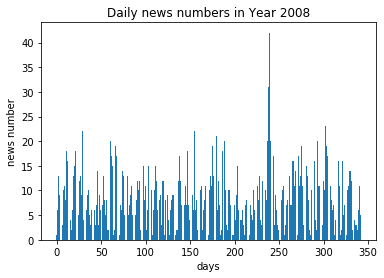

In [41]:
x8 = np.arange(len(count_2008))
plt.bar(x8,count_2008)
plt.title("Daily news numbers in Year 2008")
plt.xlabel("days")
plt.ylabel("news number")
plt.show()

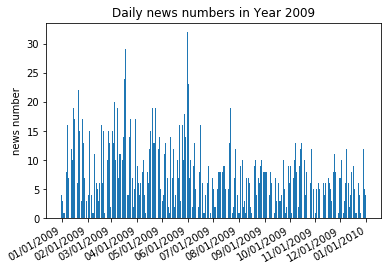

In [11]:
s2009.index = pd.to_datetime(s2009.index)
# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Plot
plt.bar(s2009.index, count_2009)
plt.title("Daily news numbers in Year 2009")
#plt.xlabel("days")
plt.ylabel("news number")
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.savefig("2009.jpg")
plt.show()


#monthsLoc = mpl.dates.MonthLocator()
#ax1.xaxis.set_major_locator(monthsLoc)

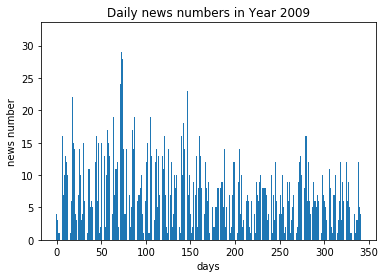

In [42]:
x9 = np.arange(len(count_2009))
plt.bar(x9,count_2009)
plt.title("Daily news numbers in Year 2009")
plt.xlabel("days")
plt.ylabel("news number")
plt.show()

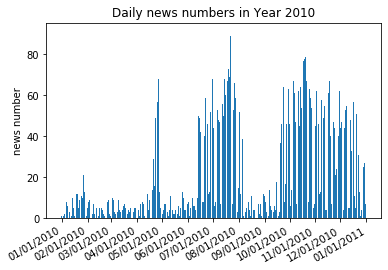

In [12]:
s2010.index = pd.to_datetime(s2010.index)
# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Plot
plt.bar(s2010.index, count_2010)
plt.title("Daily news numbers in Year 2010")
#plt.xlabel("days")
plt.ylabel("news number")
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.savefig("2010.jpg")
plt.show()


#monthsLoc = mpl.dates.MonthLocator()
#ax1.xaxis.set_major_locator(monthsLoc)

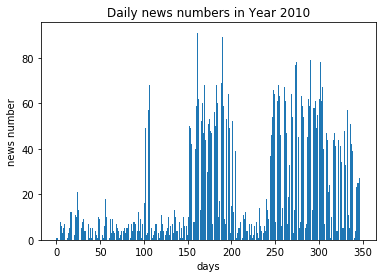

In [43]:
x10 = np.arange(len(count_2010))
plt.bar(x10,count_2010)
plt.title("Daily news numbers in Year 2010")
plt.xlabel("days")
plt.ylabel("news number")
plt.show()

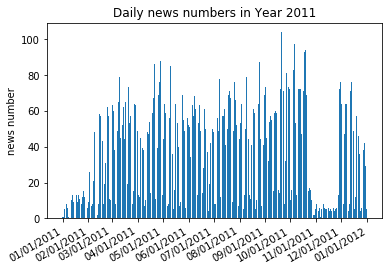

In [13]:
s2011.index = pd.to_datetime(s2011.index)
# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Plot
plt.bar(s2011.index, count_2011)
plt.title("Daily news numbers in Year 2011")
#plt.xlabel("days")
plt.ylabel("news number")
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.savefig("2011.jpg")
plt.show()


#monthsLoc = mpl.dates.MonthLocator()
#ax1.xaxis.set_major_locator(monthsLoc)

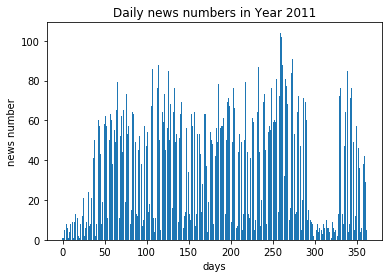

In [44]:
x11 = np.arange(len(count_2011))
plt.bar(x11,count_2011)
plt.title("Daily news numbers in Year 2011")
plt.xlabel("days")
plt.ylabel("news number")
plt.show()

news uncertainty in unknown composition of individuals

In [14]:
exm = x_train.loc['2011-09-20'] #Series

In [ ]:
#Using NLTK’s Pre-Trained Sentiment Analyzer
#NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

In [15]:
ema = exm.tolist()

In [57]:
#len(ema)#104

In [60]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /userhome/35/yqdeng/nltk_data...


True

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
ana = SentimentIntensityAnalyzer()
polar = []
for news in ema:
    scores = ana.polarity_scores(news)
    polar.append(scores)

In [17]:
polar

[{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.2732},
 {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.34},
 {'neg': 0.684, 'neu': 0.316, 'pos': 0.0, 'compound': -0.8689},
 {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.2846},
 {'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.0258},
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7506},
 {'neg': 0.174, 'neu': 0.826, 'pos': 0.0

In [18]:
df = pd.DataFrame.from_records(polar)
df

,neg,neu,pos,compound
0,0.000,0.667,0.333,0.4588
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,0.792,0.208,0.2732
...,...,...,...,...
99,0.000,1.000,0.000,0.0000
100,0.000,1.000,0.000,0.0000
101,0.000,1.000,0.000,0.0000
102,0.000,1.000,0.000,0.0000


In [19]:
#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05
#pos, neu, neu, neu, pos, neg, neg, pos, neg, 
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df

,neg,neu,pos,compound,label
0,0.000,0.667,0.333,0.4588,1
1,0.000,1.000,0.000,0.0000,0
2,0.000,1.000,0.000,0.0000,0
3,0.000,1.000,0.000,0.0000,0
4,0.000,0.792,0.208,0.2732,1
...,...,...,...,...,...
99,0.000,1.000,0.000,0.0000,0
100,0.000,1.000,0.000,0.0000,0
101,0.000,1.000,0.000,0.0000,0
102,0.000,1.000,0.000,0.0000,0


In [20]:
print(df.label.value_counts())

-1    38
 0    38
 1    28
Name: label, dtype: int64


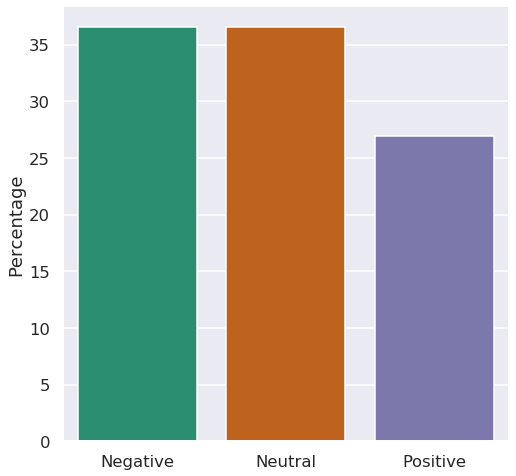

In [35]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

fig, ax = plt.subplots(figsize=(8, 8))
 
counts = df.label.value_counts(normalize=True) * 100
 
sns.barplot(x=counts.index, y=counts, ax=ax)
 
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
 
plt.show()

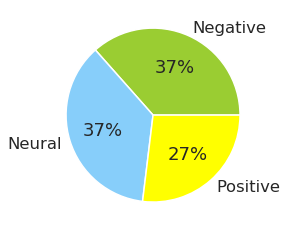

In [38]:
# 饼图
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

labels = ("Negative","Neural","Positive")
#colors = ("red","blue","yellow")
colors = ['yellowgreen','lightskyblue','yellow']
fracs = [38,38,28]

plt.pie(fracs,labels=labels,colors=colors,autopct='%1.0f%%')
plt.show()

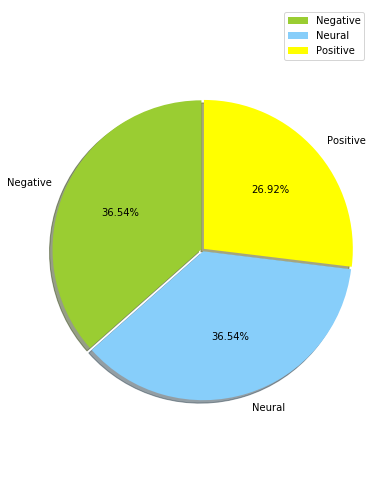

In [22]:
plt.figure(figsize=(6,9)) #调节图形大小
labels = ("Negative","Neural","Positive")
sizes = [38,38,28] #每块值
colors = ['yellowgreen','lightskyblue','yellow'] #每块颜色定义
explode = (0.01,0.01,0.01) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = True, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.legend(labels, loc="best")        # 绘制图的图例为name，位置为最佳
#plt.title("unknown individual composition of news in one trading day")     # 饼图的名称4
plt.savefig("news weak composition.jpg")
plt.show()

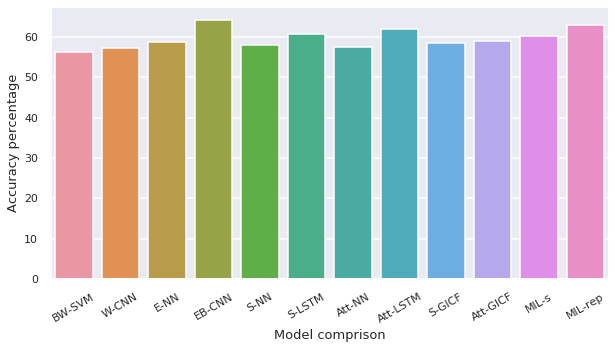

In [24]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

fig, ax = plt.subplots(figsize=(10, 5))
y = ['56.38','57.22','58.83','64.21','57.92','60.79','57.59','61.93','58.52','59.09','60.23',
    '63.06']
x = np.arange(len(y))
sns.barplot(x, y, ax=ax)

plt.tick_params(labelsize=11)
ax = plt.gca()
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
    
ax.set_xticklabels(['BW-SVM', 'W-CNN', 'E-NN','EB-CNN','S-NN','S-LSTM','Att-NN','Att-LSTM','S-GICF','Att-GICF','MIL-s','MIL-rep'])
ax.set_xlabel("Model comprison",fontsize=13)
ax.set_ylabel("Accuracy percentage",fontsize=13)
  
plt.savefig("results.jpg")
plt.show()

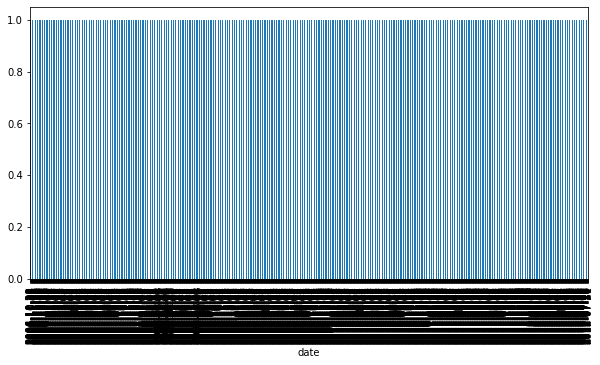

In [9]:
%matplotlib inline
x_train.groupby(x_train.index).size().plot(kind='bar', figsize = (10,5))